# **SVM Support Vector Machine**



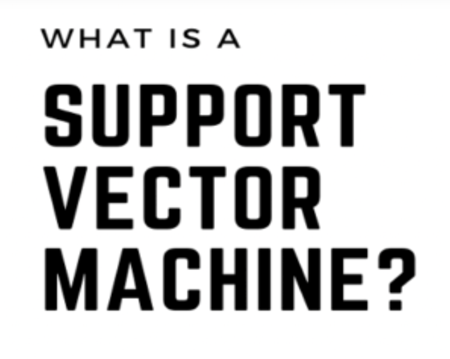

**Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression tasks. However, it is mostly used for classification problems.**

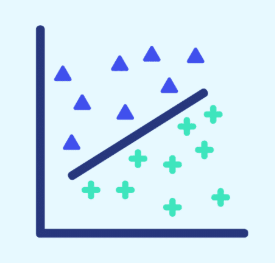

# Goal of SVM:

SVM aims to find the best boundary (decision boundary or hyperplane) that separates different classes of data points in a dataset.
This boundary helps predict the class of new data points.


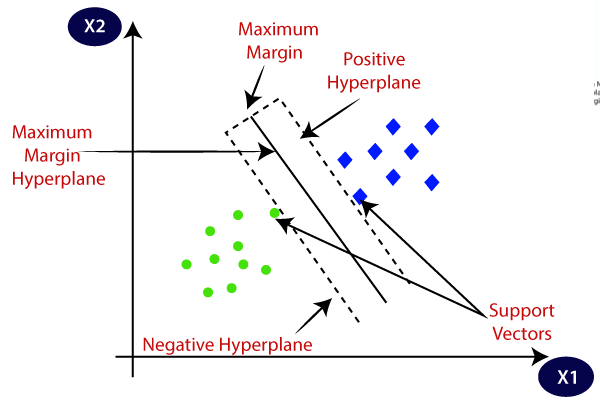

# How SVM Works:

Think of SVM as a way to draw a line (or a surface in higher dimensions) that splits data points into two groups.

It chooses the line that is as far as possible from the nearest data points of each group. These nearest points are called support vectors because they "support" the boundary.

#Key Terms in SVM:

**Hyperplane:** The decision boundary that separates classes.

**Margin:** The distance between the hyperplane and the nearest data points from each class. SVM tries to maximize this margin to make the separation robust.

**Maximum Margin Hyperplane are super sensitive to outliers in the training data.**

### `Cross Validation`

Basically it is used to evlaute and improve the performance of the ML model by dividing the dataset into different subsets
then through iterations of training of data to get a better understanding of how well the model generalizes to unseen data, then checking this subsets for both traning and testting which (basically by dividing we give all the samples of dataset get a chance in both traning and testing) then based on this we get different outputs in each of the iterations and then we take mean of these outputs to get the final output

it a type of resampling technique

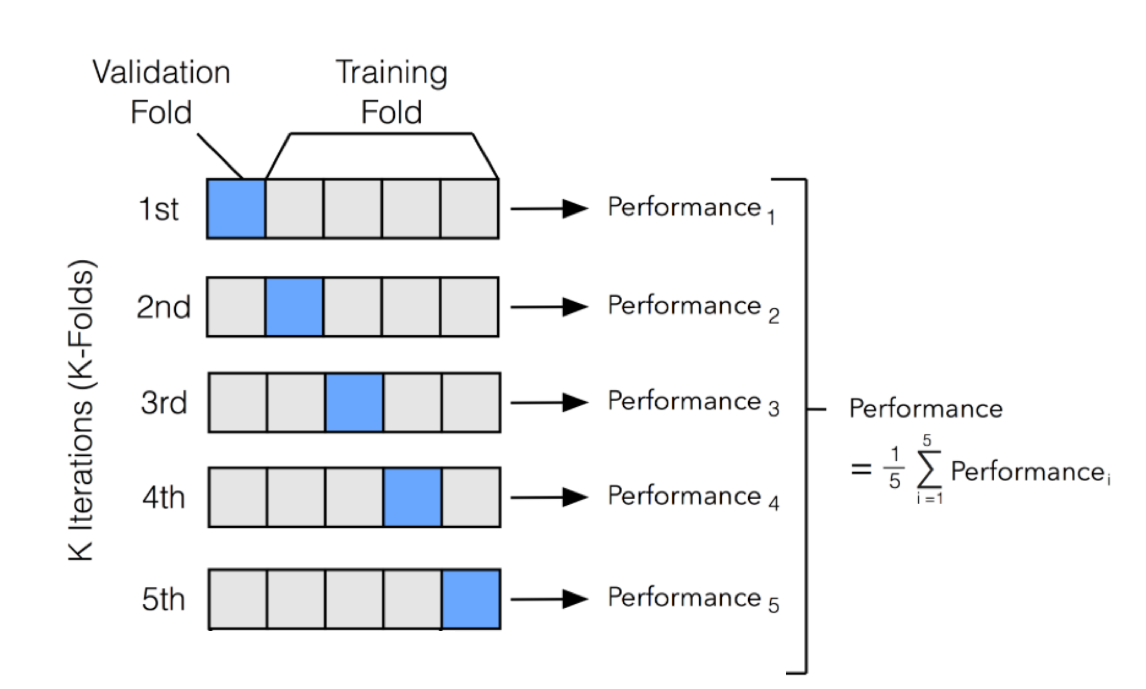



### Why Use Cross-Validation?

- **Mitigates Overfitting**: Ensures the model isn't overly tuned to specific data patterns in the training set.
- **Better Generalization**: Assesses the model's performance on different data splits, making it robust.
- **Efficient Data Use**: Uses the entire dataset for both training and validation across multiple iterations.

---

### How Cross-Validation Works

1. **Split the Dataset**: The data is divided into `k` subsets (folds).
2. **Iterate through Folds**:
   - For each iteration:
     - One fold is used as the validation set.
     - The remaining `k-1` folds are used as the training set.
3. **Train and Test the Model**:
   - Train the model on the training folds.
   - Test the model on the validation fold.
4. **Repeat for All Folds**: Perform the above steps `k` times, each time using a different fold as the validation set.
5. **Aggregate Results**: Combine the performance metrics (e.g., accuracy, precision, etc.) from all iterations to get a final evaluation.

---

### Benefits of Cross-Validation

- **Efficient Use of Data**: Especially helpful when the dataset is small.
- **Robust Evaluation**: Provides a more accurate estimate of model performance compared to a single train-test split.
- **Model Selection**: Helps in choosing the best model or hyperparameters by comparing performance across folds.

---

### Example in Python

```python
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize model
model = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV

# Print scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
```

---

### Key Metrics from Cross-Validation

- **Mean Score**: Average performance across all folds.
- **Standard Deviation**: Variation in performance across folds; low variation indicates consistency.
- **Fold-wise Scores**: Helps identify if performance degrades in specific splits (e.g., due to poor data representation).

---

### When to Use Cross-Validation

- **Hyperparameter Tuning**: Evaluate different hyperparameter configurations.
- **Model Comparison**: Compare multiple models under similar evaluation settings.
- **Small Datasets**: To maximize data utility for both training and validation. 

Cross-validation is a cornerstone of reliable model evaluation and selection.

# Real-Life Example:

**Email Spam Detection:**

SVM can classify emails as "spam" or "not spam" by finding the boundary that separates the two categories based on features like word frequency.

# SVM Implementation uisng Drug Dataset

#### Objective:

**The objective of this project is to accurately predict the suitable drug outcomes for patients.**

#### Data Description

Age - Age of the Patient

Sex - Gender of the patients

BP - Blood Pressure Levels

Cholesterol - Cholesterol Levels

Na_to_K - Sodium to potassium Ration in Blood

Drug - Drug Type

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set_palette('deep')
%matplotlib inline

import numpy as np

import statistics as stats

import datetime as dt
import dataframe_image as dfi

In [29]:
df=pd.read_csv('drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


* `Independent columns - Age,Sex,BP,Cholesterol,Na_to_K`
* `target column - Drug`


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [47]:
df['Drug'].unique()

array([0, 3, 4, 1, 2])

In [31]:
df.duplicated().sum()


0

In [32]:
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

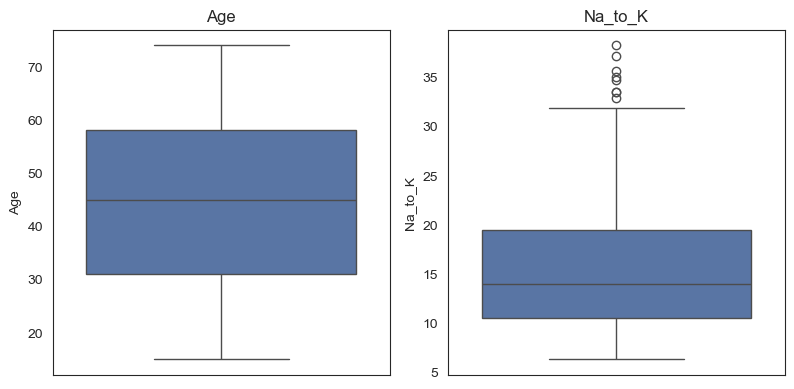

In [33]:
numeric_cols=df.select_dtypes(include='number').columns
num_cols=len(numeric_cols)
ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

**So No need to remove outliers**

In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [34]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col].astype(str))
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [35]:
X=df.drop('Drug',axis=1)
y=df['Drug']

In [37]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [38]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

#### Model Buidling

In [39]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20, random_state=23)

In [44]:
from sklearn.svm import SVC
model=SVC()

In [45]:
model.fit(Xtrain,ytrain)

SVC()

In [46]:
predict=model.predict(Xtest)
predict

array([4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0,
       0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4])

In [48]:
df['Drug'].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [55]:
from sklearn.metrics import *
accuracy_score( ytest,predict )*100

72.5

# SVM Implementation uisng Breast_cancer dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set_palette('deep')
%matplotlib inline

import numpy as np

import statistics as stats

import datetime as dt
from sklearn import datasets

In [2]:
cancer=datasets.load_breast_cancer()


In [3]:
db=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
db.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




### `load_breast_cancer` Feature Descriptions:
Here’s a summary of the feature definitions:

| **Feature Name**               | **Description**                                   |
|---------------------------------|---------------------------------------------------|
| `mean radius`                  | Mean of distances from center to points on the perimeter. |
| `mean texture`                 | Standard deviation of gray-scale values.          |
| `mean perimeter`               | Mean size of the core tumor perimeter.            |
| `mean area`                    | Mean area of the tumor.                           |
| `mean smoothness`              | Mean of local variation in radius lengths.        |
| `mean compactness`             | Mean of perimeter² / area - 1.0.                  |
| `mean concavity`               | Mean of severity of concave portions of the contour. |
| `mean concave points`          | Mean number of concave portions of the contour.   |
| `mean symmetry`                | Mean symmetry of the tumor shape.                 |
| `mean fractal dimension`       | Mean "coastline approximation" of the tumor boundary. |
| `radius error`                 | Standard error of radius.                         |
| `texture error`                | Standard error of texture.                        |
| `perimeter error`              | Standard error of perimeter.                      |
| `area error`                   | Standard error of area.                           |
| `smoothness error`             | Standard error of smoothness.                     |
| `compactness error`            | Standard error of compactness.                    |
| `concavity error`              | Standard error of concavity.                      |
| `concave points error`         | Standard error of concave points.                 |
| `symmetry error`               | Standard error of symmetry.                       |
| `fractal dimension error`      | Standard error of fractal dimension.              |
| `worst radius`                 | "Worst" or largest value for radius.              |
| `worst texture`                | "Worst" or largest value for texture.             |
| `worst perimeter`              | "Worst" or largest value for perimeter.           |
| `worst area`                   | "Worst" or largest value for area.                |
| `worst smoothness`             | "Worst" or largest value for smoothness.          |
| `worst compactness`            | "Worst" or largest value for compactness.         |
| `worst concavity`              | "Worst" or largest value for concavity.           |
| `worst concave points`         | "Worst" or largest value for concave points.      |
| `worst symmetry`               | "Worst" or largest value for symmetry.            |
| `worst fractal dimension`      | "Worst" or largest value for fractal dimension.   |

---


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
db['target']=cancer.target
db.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [6]:
np.array(db['target'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
x=db.drop('target',axis=1)
y=db['target']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=23)

In [10]:
from sklearn import svm

In [13]:
model=svm.SVC(kernel='linear')
model.fit(Xtrain,ytrain)


SVC(kernel='linear')

In [14]:
predict=model.predict(Xtest)

In [15]:
predict

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0])

In [17]:
from sklearn import metrics

cm=metrics.confusion_matrix(ytest,predict)

<Axes: >

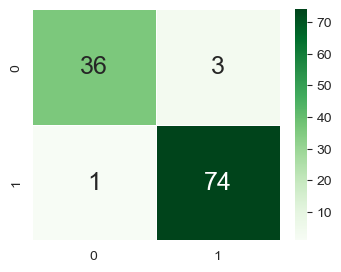

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt='d',linewidths=0.5,cmap='Greens',annot_kws={"size": 18})

In [27]:
metrics.accuracy_score(ytest,predict)*100

96.49122807017544